# Clustering in Data Science 

## LEC NO. 49) Agglomerative Heirarchical Clustering:

###### In this example, we will perform hierarchical clustering on real-world data through Agglomerative approach And see how it can be used to solve an actual problem.

###### The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends

### STEP-1) Importing Required Libraries
Let's first load the required libraries.

1) Matplotlib for visualization of data

2) Pandas for handling Data Frames

3) Numpy for carrying out efficient computations

4) import the hierarchy class of the scipy.cluster.hierarchy library

5) import the AgglomerativeClustering from sklearn.cluster library

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

### STEP-2) Reading the Data from the csv file
Let's explore our dataset a bit

In [29]:
# we will use only50 rows data whereas our tutor use 200 rows data
customer_data = pd.read_csv('F:\DataScience\shopping_data.csv')

To check the number of records and attributes, execute the following script:

In [30]:
# 1 row = 1 record AND 1 column = 1 attribute
customer_data.shape

(50, 5)

To eyeball the dataset, execute the head() function of thedata frame. 

In [31]:
# will print top 5 records
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### STEP-3)  Edit DF in Array to view the results in 2D feature space
Our dataset has five columns: CustomerID,
Gender, Age, Annual Income, and Spending Score. To
view the results in two-dimensional feature space, we
will retain only two of these five columns. We can
remove CustomerID, Gender, and Age column.

 We will
retain the Annual Income and Spending Score (1-100)
columns. The Spending Score column signifies how
often a person spends money in a mall on a scale of 1
to 100 with 100 being the highest spender.

In [32]:
# iloc() is a indexed based selecting method which means that we have to pass
# integer index in the method to select specific row/column. This method does
# not include the last element of the range passed in it unlike loc(). 
# iloc() does not accept the boolean data unlike loc().

# Execute the below code to filter the first three columns from our dataset:
data = customer_data.iloc[:, 3:5].values  
# any no. of row & 3rd,4th columns
data[:10]  
# will print top 10 out of 50

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

In [33]:
# can check above data with data1
data1=customer_data[['Annual Income (k$)','Spending Score(1-100)']]
data1.head(10)

,Annual Income (k$),Spending Score(1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


### STEP-4) Creating Dendrograms
Next,we need to know the clusters that we
want our data to be split to. We will again use
the scipy library to create the dendrograms for our
dataset.

In [34]:
import scipy.cluster.hierarchy as shc

In the script above we import the hierarchy class of
the scipy.cluster.hierarchy library as shc. The
hierarchy class has a dendrogram method which
takes the value returned by the linkage method of
the same class.

 The linkage method takes the
dataset and the method to minimize distances as
parameters. We use 'ward' as the method since it
minimizes then variants of distances between the
clusters.

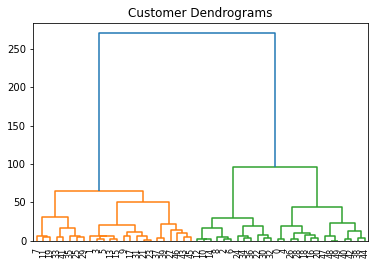

In [35]:
# our Dendrogram will be different from tutor's because we use only 50 rows data
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

### STEP-5) Find the number of clusters by observing Dendrogram
Now, once the big cluster is formed, the longest
vertical distance is selected.

Looking at the dendrogram, the highest vertical
distance that doesn’t intersect with any clusters is
the blue one. Given that 2 vertical lines
will cross the threshold.

OR In such cases, you can leverage the results from the dendrogram to approximate the number of clusters. You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

In [36]:
print("the optimal number of clusters is 2.")

the optimal number of clusters is 2.


### STEP-6)  Group the data points into above three clusters.
Now we know the number of clusters for
our dataset, the next step is to group the data
points into 2 clusters. To do so we will use the AgglomerativeClustering class of
the sklearn.cluster library. Take a look at the
following script:

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0], dtype=int64)

In above output, you can see the cluster labels from all of your data
points. Since we had two clusters, we have two
labels in the output i.e. 0 to 1.

### STEP-7) Plot the all Clusters 
As a final step, let's plot the clusters using .scatter() Fn. of matplotlib.pyplot module, to see how
actually our data has been clustered:

Text(0, 0.5, 'Spending Score')

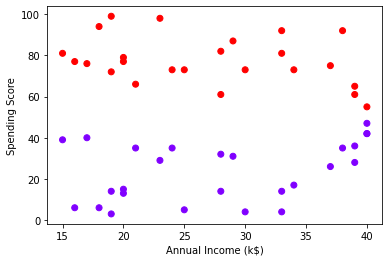

In [38]:
plt.scatter(data[:,0], data[:,1], c=cluster.labels_,cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")

###### Observations from above plot:
You can see the data points in the form of two clusters.

The
data points in the bottom (purple data points) belong to the customers
with low spending. These are the
customers that spend their money carefully.

Similarly, the
customers at top (red data points), these are the
customers high spending. These are
the type of customers that companies target.